In [1]:
import pandas as pd
import os
import gc
import math
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import time
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
data = pd.concat([train, test], axis=0, ignore_index=True)

In [3]:
cols = test.columns

In [4]:
len(cols)

68

In [5]:
cols

Index(['客户ID', '地理区域', '是否双频', '是否翻新机', '当前手机价格', '手机网络功能', '婚姻状况', '家庭成人人数',
       '信息库匹配', '预计收入', '信用卡指示器', '当前设备使用天数', '在职总月数', '家庭中唯一订阅者的数量',
       '家庭活跃用户数', '新手机用户', '信用等级代码', '平均月费用', '每月平均使用分钟数', '平均超额使用分钟数',
       '平均超额费用', '平均语音费用', '数据超载的平均费用', '平均漫游呼叫数', '当月使用分钟数与前三个月平均值的百分比变化',
       '当月费用与前三个月平均值的百分比变化', '平均掉线语音呼叫数', '平均丢弃数据呼叫数', '平均占线语音呼叫数',
       '平均占线数据调用次数', '平均未接语音呼叫数', '未应答数据呼叫的平均次数', '尝试拨打的平均语音呼叫次数',
       '尝试数据调用的平均数', '平均接听语音电话数', '平均完成的语音呼叫数', '完成数据调用的平均数', '平均客户服务电话次数',
       '使用客户服务电话的平均分钟数', '一分钟内的平均呼入电话数', '平均三通电话数', '已完成语音通话的平均使用分钟数',
       '平均呼入和呼出高峰语音呼叫数', '平均峰值数据调用次数', '使用高峰语音通话的平均不完整分钟数', '平均非高峰语音呼叫数',
       '非高峰数据呼叫的平均数量', '平均掉线或占线呼叫数', '平均尝试调用次数', '平均已完成呼叫数', '平均呼叫转移呼叫数',
       '平均呼叫等待呼叫数', '账户消费限额', '客户生命周期内的总通话次数', '客户生命周期内的总使用分钟数', '客户生命周期内的总费用',
       '计费调整后的总费用', '计费调整后的总分钟数', '计费调整后的呼叫总数', '客户生命周期内平均月费用',
       '客户生命周期内的平均每月使用分钟数', '客户整个生命周期内的平均每月通话次数', '过去三个月的平均每月使用分钟数',
       '过去三个月的平均每月通话次数', '过去三个月的平均月费用', '过去六个月的平均每月使用分钟数', '过

In [6]:
train = data[data['是否流失'].notnull()].reset_index(drop=True)
test = data[data['是否流失'].isnull()].reset_index(drop=True)


In [9]:
train['平均丢弃数据呼叫数'].value_counts(),test['平均丢弃数据呼叫数'].value_counts()

(0      148912
 1         506
 2         230
 3         111
 4          68
 5          45
 6          24
 8          21
 9          18
 7          13
 10          9
 15          6
 11          5
 13          4
 12          4
 18          4
 20          2
 17          2
 16          2
 14          2
 47          1
 78          1
 58          1
 54          1
 51          1
 24          1
 46          1
 33          1
 27          1
 21          1
 207         1
 81          1
 Name: 平均丢弃数据呼叫数, dtype: int64,
 0     29756
 1       122
 2        43
 3        27
 4        14
 5        11
 7         5
 6         5
 8         5
 9         3
 10        2
 14        2
 12        1
 20        1
 25        1
 48        1
 16        1
 Name: 平均丢弃数据呼叫数, dtype: int64)

In [12]:
train['平均客户服务电话次数'].value_counts(),test['平均客户服务电话次数'].value_counts()

(0      103138
 1       13724
 2        8352
 3        5648
 4        3972
         ...  
 675         1
 53          1
 116         1
 172         1
 124         1
 Name: 平均客户服务电话次数, Length: 96, dtype: int64,
 0      20575
 1       2739
 2       1662
 3       1082
 4        835
        ...  
 37         1
 66         1
 74         1
 132        1
 63         1
 Name: 平均客户服务电话次数, Length: 61, dtype: int64)

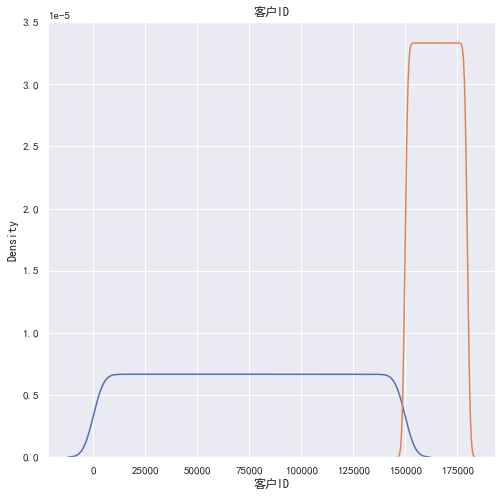

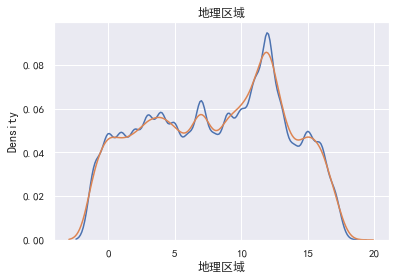

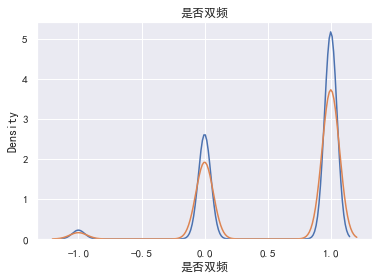

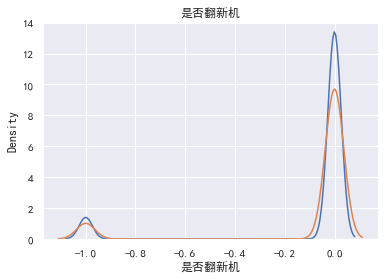

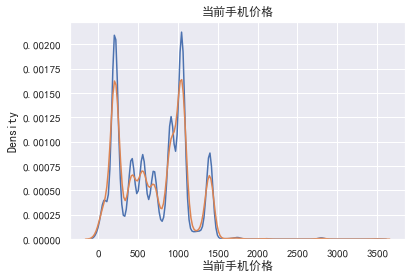

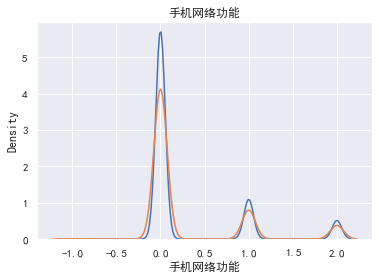

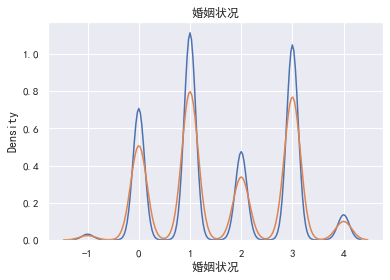

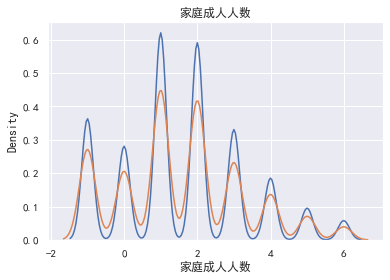

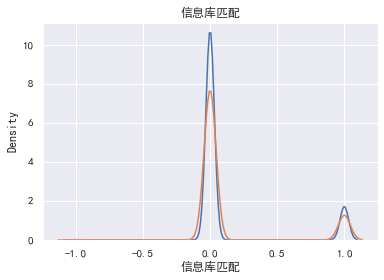

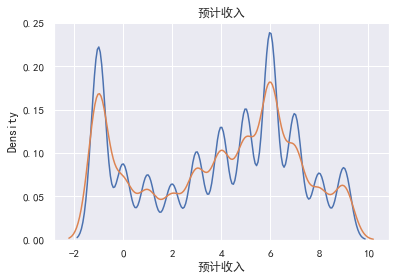

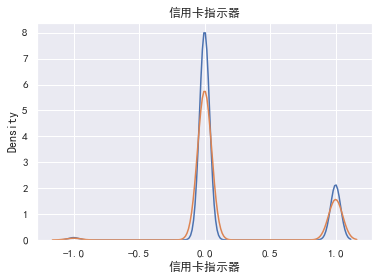

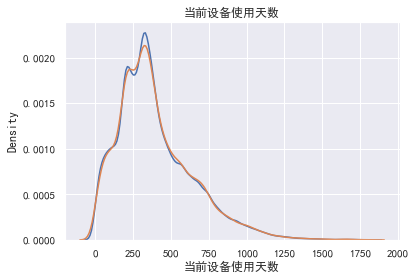

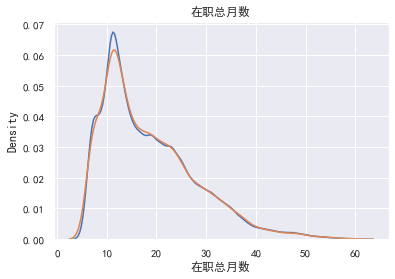

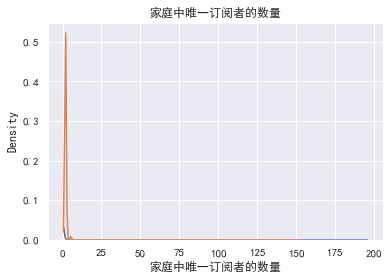

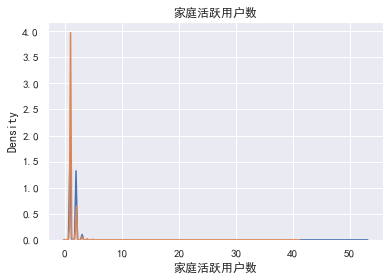

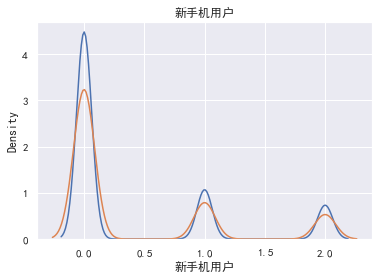

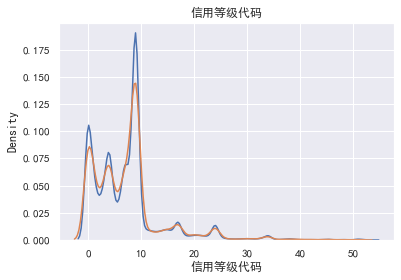

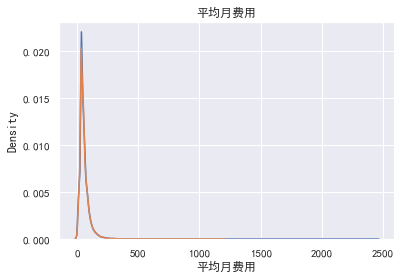

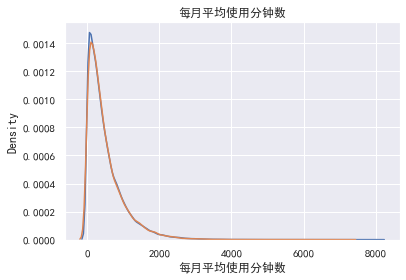

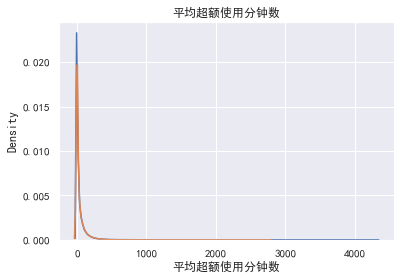

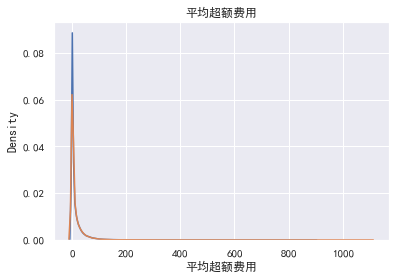

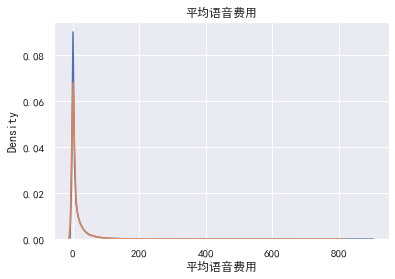

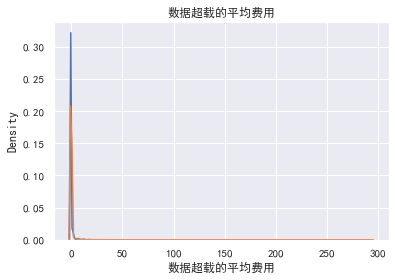

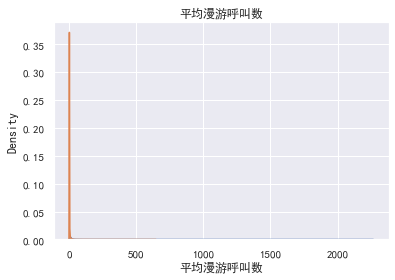

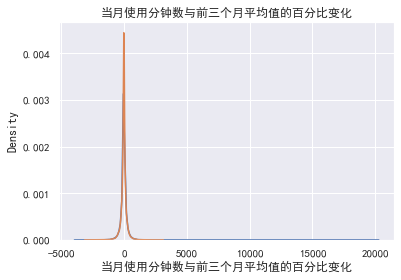

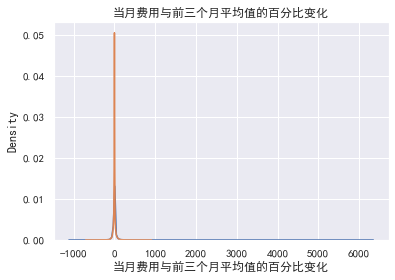

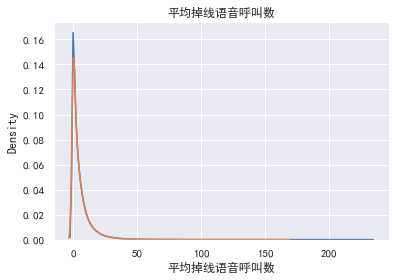

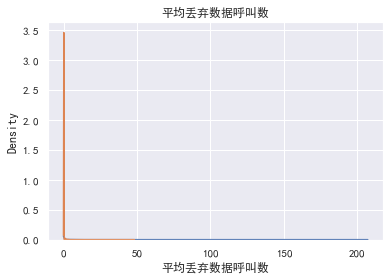

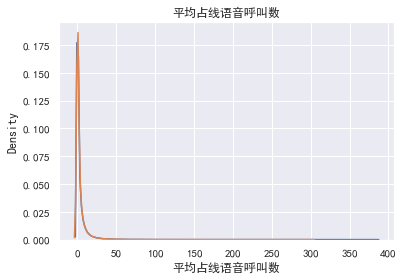

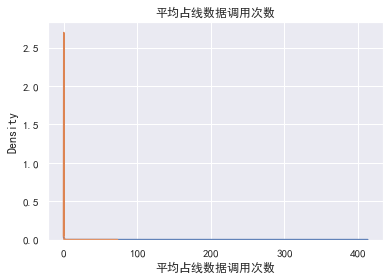

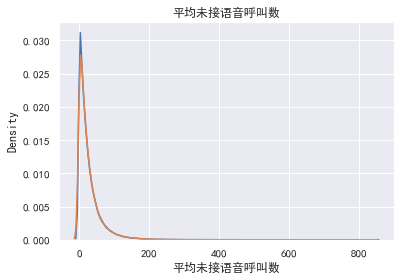

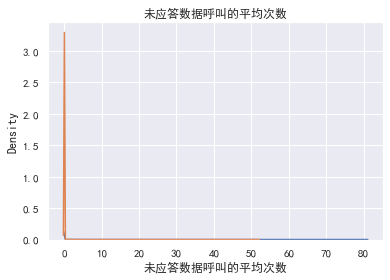

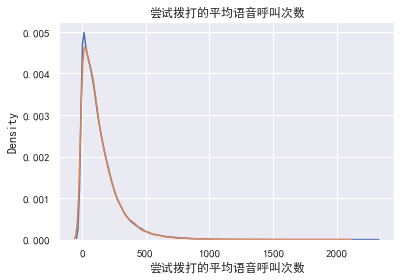

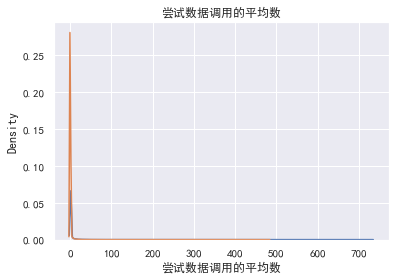

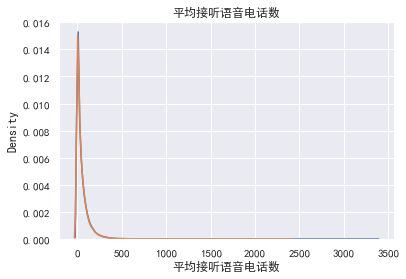

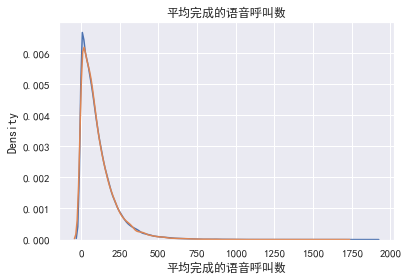

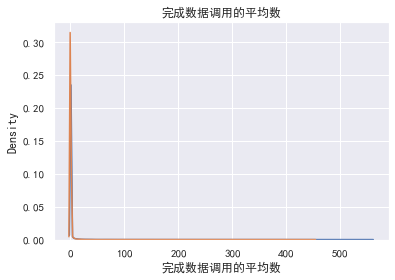

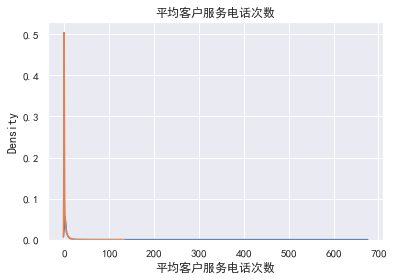

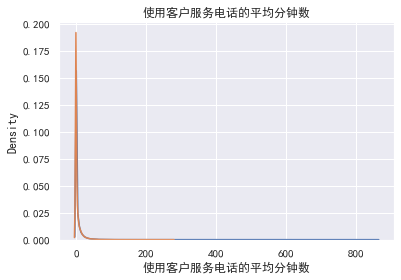

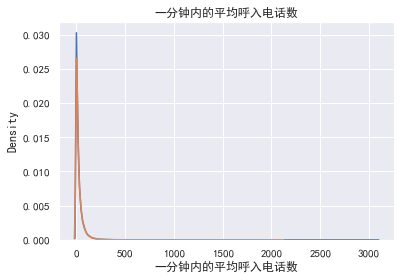

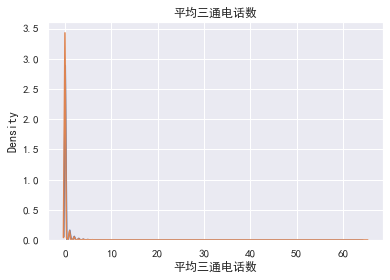

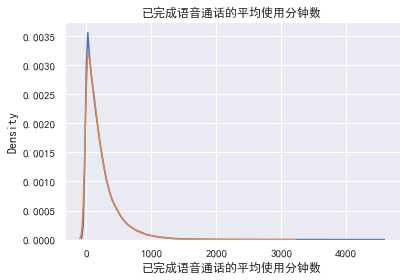

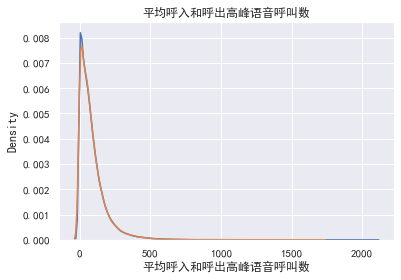

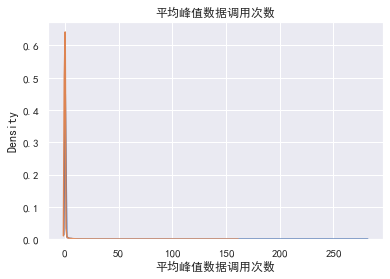

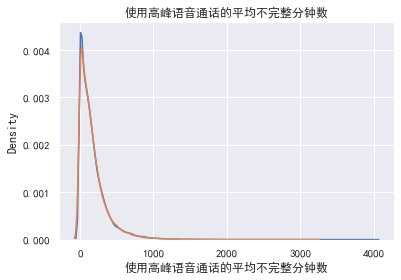

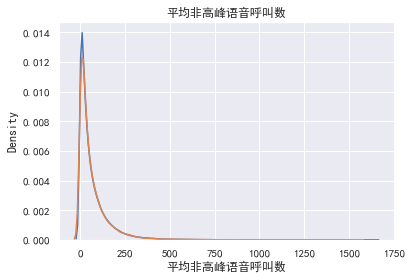

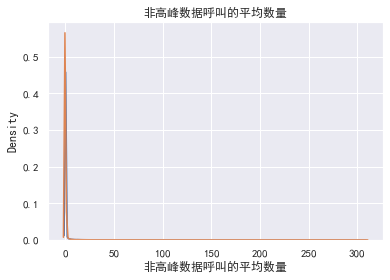

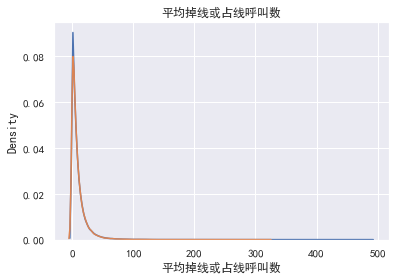

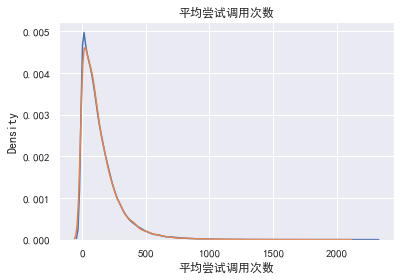

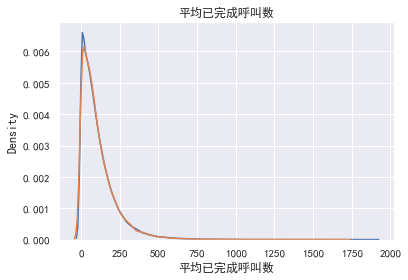

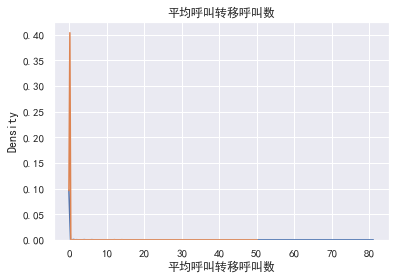

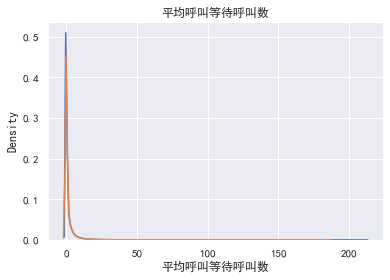

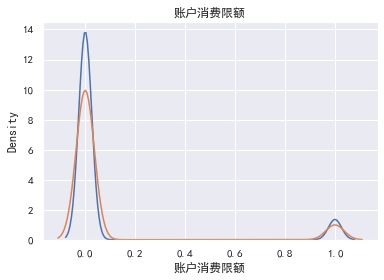

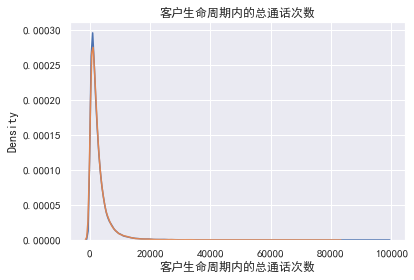

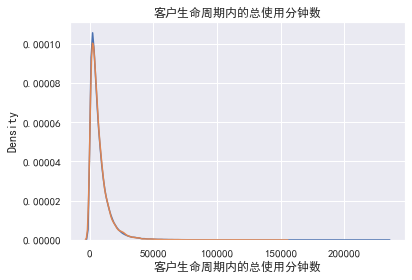

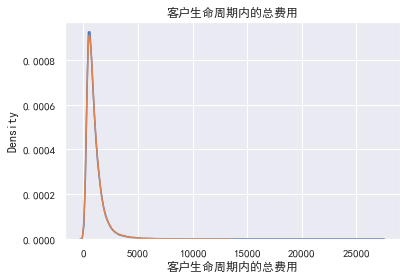

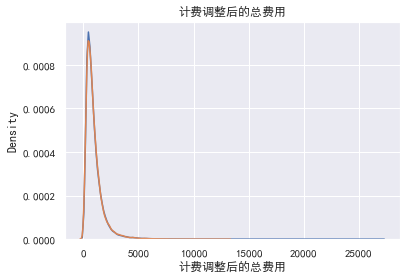

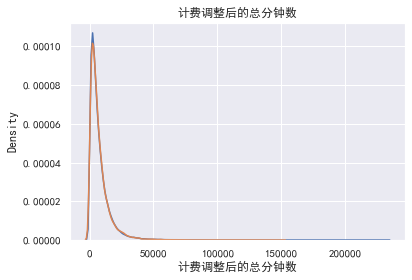

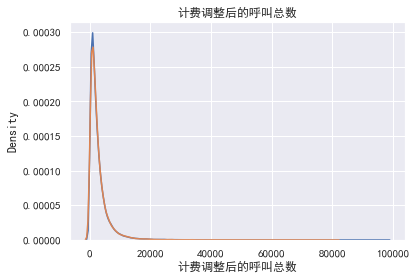

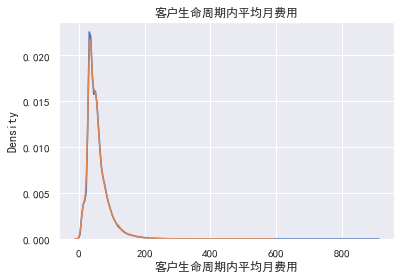

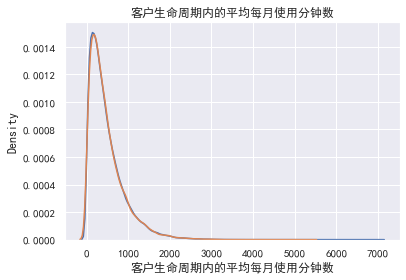

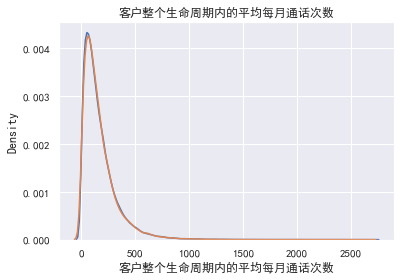

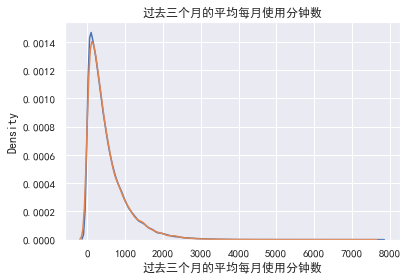

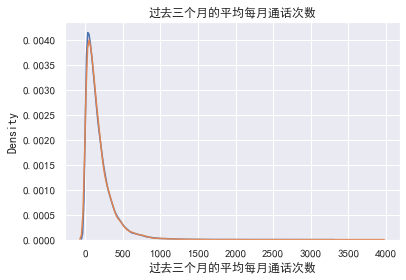

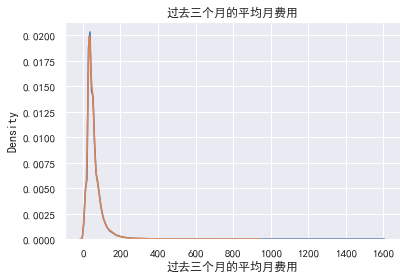

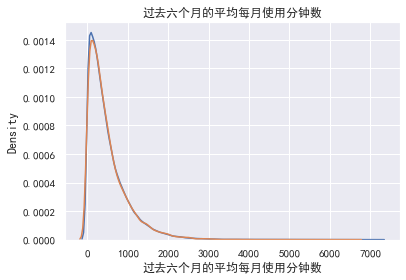

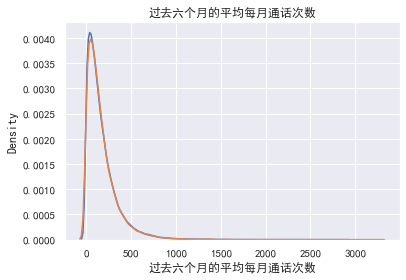

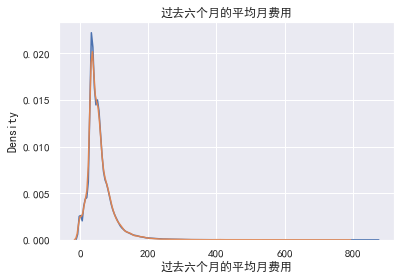

In [6]:
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

fig = plt.figure(figsize=(8,8))

for i in range(len(cols)):
    plt.subplot()
    plt.title(cols[i])
    sns.distplot(train[cols[i]],hist=False)
    sns.distplot(test[cols[i]],hist=False)
    plt.show()